In [129]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [130]:
Lx=10.0
Ly=5.0
dx=0.1
dy=0.1
D=1.0
dt=0.001
nx=int(Lx/dx)
ny=int(Ly/dy)
nt=1000

 requirement ist:    2Ddt/dx**2<1 should be valid
 
Below is the first case with periodic boundary conditions along x and y

In [131]:

def initial_first(p):
    pin_zeros=p
    return pin_zeros

def initial_second(p):
    p[:,0]=20
    p[:,-1]=10
    return p

def initial_third(p):
    x=np.linspace(0,Lx,nx+2)
    p[:,0]=20+0.5*(x-5)**2
    p[:,-1]=10-0.3*(x-5)**2
    return p


Boundary conditions

In [132]:
def boundary_cond_first(p):
    p[0,:]=p[-2,:]   #  left along x
    p[-1,:]=p[1,:]    #  right along x
    p[:,0]=p[:,-1]   #  left along y
    p[:,-1]=p[:,1]    #  right along y
    return p
def boundary_cond_sec_third_fourth(p):
    p[0,:]=p[-2,:]   #  left along x
    p[-1,:]=p[1,:]    #  right along x
    return p


In [133]:
def FTCS(pzero,initial,boundary_cond):
    p=initial(pzero)
    p_new=np.copy(p)
    for n in range(nt):
        p=boundary_cond(p)
        for i in range(1,nx+1):
            for j in range(1,ny+1):
                p_new[i,j]=p[i,j]+D*dt/dx**2*(p[i+1,j]-2.0*p[i,j]+p[i-1,j])+D*dt/dy**2*(p[i,j+1]-2.0*p[i,j]+p[i,j-1])                
        p[:] = p_new[:]
    return p

first time [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
second time [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
third time [[20.          0.          0.         ...  0.          0.
  10.        ]
 [20.         18.87447931 17.75468246 ...  8.88268875  9.43983611
  10.        ]
 [20.         18.87447931 17.75468246 ...  8.88268875  9.43983611
  10.        ]
 ...
 [20.         18.87447931 17.75468246 ...  8.88268875  9.43983611
  10.        ]
 [20.         18.87447931 17.75468246 ...  8.88268875  9.43983611
  10.        ]
 [20.          0.          0.         ...  0.          0.
  10.        ]]


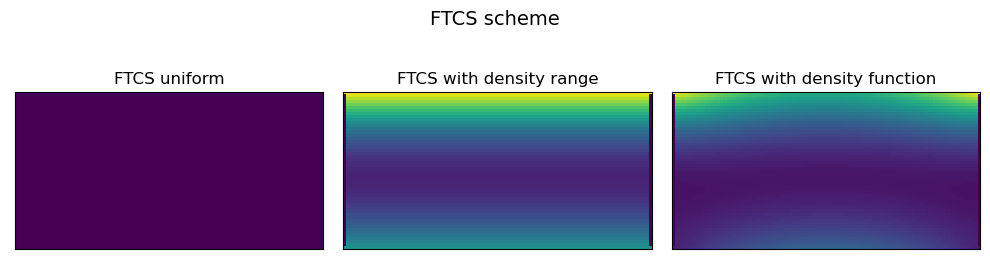

In [134]:
pin=np.zeros((nx+2,ny+2))
print('first time',pin)
resulta=FTCS(pin,initial_first,boundary_cond_first)

print('second time',pin)

pin=np.zeros((nx+2,ny+2))
resultb=FTCS(pin,initial_second,boundary_cond_sec_third_fourth)

print('third time',pin)
pin=np.zeros((nx+2,ny+2))
resultc=FTCS(pin,initial_third,boundary_cond_sec_third_fourth)

rez0=np.array([U for U in resulta])
rez1=np.array([U for U in resultb])
rez2=np.array([U for U in resultc])

titles=["FTCS uniform","FTCS with density range","FTCS with density function"]

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

for axi,rezi,title in zip(ax.flat,[rez0,rez1,rez2],titles):
    axi.imshow(rezi.T,cmap='viridis')
    axi.set_xticks([])
    axi.set_yticks([])
    axi.set_title(title)
fig.suptitle("FTCS scheme",fontsize=14)
fig.tight_layout()


#fig.colorbar(neg0,ax=ax[0],location='right',anchor=(0, 0.5), shrink=0.3,label='p')
#ax[0].set_title('FTCS method uniform')
#ax[0].set_ylabel('y')


plt.show()